In [21]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Load in the SIBYLL2.1 particle sims
#Using saved_data.py to save year, interaction model
KEYS = ['energy', 'type', 'nstrings', 'IceTop_reco_succeeded', 'showerplanezen', 'laputopzen', 'Hweights', 'Gweights']

#give dictionary year and model you want to run, then you can call the key names later (like I did in the dataframe I made
#below
year = 2012
simulation = "SIBYLL2.1"

for key in KEYS:
    if os.path.isfile(f'saved_data/{year}/{simulation}/{key}.npy'):
        with open(f'saved_data/{year}/{simulation}/{key}.npy', 'rb') as file:
            globals()[key] = np.load(file)

In [23]:
df = pd.DataFrame({'nStations': nstrings, 'Primary Energy': energy, 'weightsH4a': Hweights, 'weightsGSF': Gweights, 'type': type, 
                   'reco': IceTop_reco_succeeded, 'showerplane': showerplanezen, 'laputop': laputopzen})
#print(df)

In [33]:
#weighted quantiles for median (takes weighted median)
def weighted_quantiles(values, weights, quantiles=0.5):
    i = np.argsort(values) #sorts values by some metric
    c = np.cumsum(weights[i]) #cumulative sum of elements along given axis
    return values[i[np.searchsorted(c, np.array(quantiles) * c[-1])]]

In [34]:
eV = 1e9
PeV = 1e15

In [35]:
#with reco passed quality cut and showerplane and laputop zenith angle cuts
#no reco passed cut for tier 1, because reco cut fails for all tier 1 events
#tier 1
tier1 = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['showerplane'] < np.radians(55))] #& (df['reco']==1)]
tier1energy = tier1['Primary Energy'].to_numpy()
weightstier1H4a = tier1['weightsH4a'].to_numpy()
weightstier1GSF = tier1['weightsGSF'].to_numpy()

#tier 1 proton
tier1p = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==2212.0) & (df['showerplane'] < np.radians(55))] #(df['reco']==1)}
t1penergy = tier1p['Primary Energy'].to_numpy()
weightsH4a1p = tier1p['weightsH4a'].to_numpy()
weightsGSF1p = tier1p['weightsGSF'].to_numpy()

#tier 1 helium
tier1h = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000020040.0) & (df['showerplane'] < np.radians(55))]
t1henergy = tier1h['Primary Energy'].to_numpy()
weightsH4a1h = tier1h['weightsH4a'].to_numpy()
weightsGSF1h = tier1h['weightsGSF'].to_numpy()

#tier 1 oxygen
tier1o = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000080160.0) & (df['showerplane'] < np.radians(55))]
t1oenergy = tier1o['Primary Energy'].to_numpy()
weightsH4a1o = tier1o['weightsH4a'].to_numpy()
weightsGSF1o = tier1o['weightsGSF'].to_numpy()

#tier 1 iron
tier1Fe = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000260560.0) & (df['showerplane'] < np.radians(55))] #(df['reco']==1)]
t1Feenergy = tier1Fe['Primary Energy'].to_numpy()
weightsH4a1Fe = tier1Fe['weightsH4a'].to_numpy()
weightsGSF1Fe = tier1Fe['weightsGSF'].to_numpy()

#tier 2
tier2 = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
tier2energy = tier2['Primary Energy'].to_numpy()
weightstier2H4a = tier2['weightsH4a'].to_numpy()
weightstier2GSF = tier2['weightsGSF'].to_numpy()

#tier 2 proton
tier2p = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2penergy = tier2p['Primary Energy'].to_numpy()
weightsH4a2p = tier2p['weightsH4a'].to_numpy()
weightsGSF2p = tier2p['weightsGSF'].to_numpy()

#tier 2 helium
tier2h = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2henergy = tier2h['Primary Energy'].to_numpy()
weightsH4a2h = tier2h['weightsH4a'].to_numpy()
weightsGSF2h = tier2h['weightsGSF'].to_numpy()

#tier 2 oxygen
tier2o = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2oenergy = tier2o['Primary Energy'].to_numpy()
weightsH4a2o = tier2o['weightsH4a'].to_numpy()
weightsGSF2o = tier2o['weightsGSF'].to_numpy()

#tier 2 iron
tier2Fe = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2Feenergy = tier2Fe['Primary Energy'].to_numpy()
weightsH4a2Fe = tier2Fe['weightsH4a'].to_numpy()
weightsGSF2Fe = tier2Fe['weightsGSF'].to_numpy()

#tier 3 
tier3 = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
tier3energy = tier3['Primary Energy'].to_numpy()
weightstier3H4a = tier3['weightsH4a'].to_numpy()
weightstier3GSF = tier3['weightsGSF'].to_numpy()

#tier 3 proton
tier3p = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3penergy = tier3p['Primary Energy'].to_numpy()
weightsH4a3p = tier3p['weightsH4a'].to_numpy()
weightsGSF3p = tier3p['weightsGSF'].to_numpy()

#tier 3 helium
tier3h = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3henergy = tier3h['Primary Energy'].to_numpy()
weightsH4a3h = tier3h['weightsH4a'].to_numpy()
weightsGSF3h = tier3h['weightsGSF'].to_numpy()

#tier 3 oxygen
tier3o = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3oenergy = tier3o['Primary Energy'].to_numpy()
weightsH4a3o = tier3o['weightsH4a'].to_numpy()
weightsGSF3o = tier3o['weightsGSF'].to_numpy()

#tier 3 iron
tier3Fe = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3Feenergy = tier3Fe['Primary Energy'].to_numpy()
weightsH4a3Fe = tier3Fe['weightsH4a'].to_numpy()
weightsGSF3Fe = tier3Fe['weightsGSF'].to_numpy()

#tier 4
tier4 = df[(df['nStations'] >= 16) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
tier4energy = tier4['Primary Energy'].to_numpy()
weightstier4H4a = tier4['weightsH4a'].to_numpy()
weightstier4GSF = tier4['weightsGSF'].to_numpy()

#tier 4 proton
tier4p = df[(df['nStations'] >= 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4penergy = tier4p['Primary Energy'].to_numpy()
weightsH4a4p = tier4p['weightsH4a'].to_numpy()
weightsGSF4p = tier4p['weightsGSF'].to_numpy()

#tier 4 helium
tier4h = df[(df['nStations'] >= 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4henergy = tier4h['Primary Energy'].to_numpy()
weightsH4a4h = tier4h['weightsH4a'].to_numpy()
weightsGSF4h = tier4h['weightsGSF'].to_numpy()

#tier 4 oxygen
tier4o = df[(df['nStations'] >= 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4oenergy = tier4o['Primary Energy'].to_numpy()
weightsH4a4o = tier4o['weightsH4a'].to_numpy()
weightsGSF4o = tier4o['weightsGSF'].to_numpy()

#tier 4 iron
tier4Fe = df[(df['nStations'] >= 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4Feenergy = tier4Fe['Primary Energy'].to_numpy()
weightsH4a4Fe = tier4Fe['weightsH4a'].to_numpy()
weightsGSF4Fe = tier4Fe['weightsGSF'].to_numpy()

In [36]:
#Apply Weighted Quantiles
#tier 1
t1PeV = round(((weighted_quantiles(tier1energy, weightstier1H4a) * eV ) / PeV), 2)
t1PeV_ = round(((weighted_quantiles(tier1energy, weightstier1GSF) * eV ) / PeV), 2)
t1pPeV =  round(((weighted_quantiles(t1penergy, weightsH4a1p) * eV ) / PeV), 2)
t1pPeV_ = round(((weighted_quantiles(t1penergy, weightsGSF1p) * eV ) / PeV), 2)
t1hPeV = round(((weighted_quantiles(t1henergy, weightsH4a1h) * eV ) / PeV), 2)
t1hPeV_ = round(((weighted_quantiles(t1henergy, weightsGSF1h) * eV ) / PeV), 2)
t1oPeV = round(((weighted_quantiles(t1oenergy, weightsH4a1o) * eV ) / PeV), 2)
t1oPeV_ = round(((weighted_quantiles(t1oenergy, weightsGSF1o) * eV ) / PeV), 2)
t1FePeV =  round(((weighted_quantiles(t1Feenergy, weightsH4a1Fe) * eV ) / PeV), 2)
t1FePeV_ = round(((weighted_quantiles(t1Feenergy, weightsGSF1Fe) * eV ) / PeV), 2)

#tier 2
t2PeV =  round(((weighted_quantiles(tier2energy, weightstier2H4a) * eV ) / PeV), 2)
t2PeV_ = round(((weighted_quantiles(tier2energy, weightstier2GSF) * eV ) / PeV), 2)
t2pPeV = round(((weighted_quantiles(t2penergy, weightsH4a2p) * eV ) / PeV), 2)
t2pPeV_ = round(((weighted_quantiles(t2penergy, weightsGSF2p) * eV ) / PeV), 2)
t2hPeV = round(((weighted_quantiles(t2henergy, weightsH4a2h) * eV ) / PeV), 2)
t2hPeV_ = round(((weighted_quantiles(t2henergy, weightsGSF2h) * eV ) / PeV), 2)
t2oPeV = round(((weighted_quantiles(t2oenergy, weightsH4a2o) * eV ) / PeV), 2)
t2oPeV_ = round(((weighted_quantiles(t2oenergy, weightsGSF2o) * eV ) / PeV), 2)
t2FePeV =  round(((weighted_quantiles(t2Feenergy, weightsH4a2Fe) * eV ) / PeV), 2)
t2FePeV_ = round(((weighted_quantiles(t2Feenergy, weightsGSF2Fe) * eV ) / PeV), 2)

#tier 3
t3PeV =  round(((weighted_quantiles(tier3energy, weightstier3H4a) * eV ) / PeV), 2)
t3PeV_ = round(((weighted_quantiles(tier3energy, weightstier3GSF) * eV ) / PeV), 2)
t3pPeV =  round(((weighted_quantiles(t3penergy, weightsH4a3p) * eV ) / PeV), 2)
t3pPeV_ = round(((weighted_quantiles(t3penergy, weightsGSF3p) * eV ) / PeV), 2)
t3hPeV = round(((weighted_quantiles(t3henergy, weightsH4a3h) * eV ) / PeV), 2)
t3hPeV_ = round(((weighted_quantiles(t3henergy, weightsGSF3h) * eV ) / PeV), 2)
t3oPeV = round(((weighted_quantiles(t3oenergy, weightsH4a3o) * eV ) / PeV), 2)
t3oPeV_ = round(((weighted_quantiles(t3oenergy, weightsGSF3o) * eV ) / PeV), 2)
t3FePeV =  round(((weighted_quantiles(t3Feenergy, weightsH4a3Fe) * eV ) / PeV), 2)
t3FePeV_ = round(((weighted_quantiles(t3Feenergy, weightsGSF3Fe) * eV ) / PeV), 2)

#tier 4
t4PeV =  round(((weighted_quantiles(tier4energy, weightstier4H4a) * eV ) / PeV), 2)
t4PeV_ = round(((weighted_quantiles(tier4energy, weightstier4GSF) * eV ) / PeV), 2)
t4pPeV =  round(((weighted_quantiles(t4penergy, weightsH4a4p) * eV ) / PeV), 2)
t4pPeV_ = round(((weighted_quantiles(t4penergy, weightsGSF4p) * eV ) / PeV), 2)
t4hPeV = round(((weighted_quantiles(t4henergy, weightsH4a4h) * eV ) / PeV), 2)
t4hPeV_ = round(((weighted_quantiles(t4henergy, weightsGSF4h) * eV ) / PeV), 2)
t4oPeV = round(((weighted_quantiles(t4oenergy, weightsH4a4o) * eV ) / PeV), 2)
t4oPeV_ = round(((weighted_quantiles(t4oenergy, weightsGSF4o) * eV ) / PeV), 2)
t4FePeV =  round(((weighted_quantiles(t4Feenergy, weightsH4a4Fe) * eV ) / PeV), 2)
t4FePeV_ = round(((weighted_quantiles(t4Feenergy, weightsGSF4Fe) * eV ) / PeV), 2)

In [37]:
#weighted percentile output

#tier 1
tier1_68H = (f'        {round(weighted_quantiles(tier1energy/1e6, weightstier1H4a, quantiles=.16), 2)}-{round(weighted_quantiles(tier1energy/1e6, weightstier1H4a, .84), 2)}')
tier1_68G = (f'        {round(weighted_quantiles(tier1energy/1e6, weightstier1GSF, quantiles=.16), 2)}-{round(weighted_quantiles(tier1energy/1e6, weightstier1GSF, .84), 2)}')
tier1p_68H = (f'         {round(weighted_quantiles(t1penergy/1e6, weightsH4a1p, quantiles=.16), 2)}-{round(weighted_quantiles(t1penergy/1e6, weightsH4a1p, .84), 2)}')
tier1p_68G = (f'         {round(weighted_quantiles(t1penergy/1e6, weightsGSF1p, quantiles=.16), 2)}-{round(weighted_quantiles(t1penergy/1e6, weightsGSF1p, .84), 2)}')
tier1h_68H = (f'         {round(weighted_quantiles(t1henergy/1e6, weightsH4a1h, quantiles=.16), 2)}-{round(weighted_quantiles(t1henergy/1e6, weightsH4a1h, .84), 2)}')
tier1h_68G = (f'         {round(weighted_quantiles(t1henergy/1e6, weightsGSF1h, quantiles=.16), 2)}-{round(weighted_quantiles(t1henergy/1e6, weightsGSF1h, .84), 2)}')
tier1o_68H = (f'         {round(weighted_quantiles(t1oenergy/1e6, weightsH4a1o, quantiles=.16), 2)}-{round(weighted_quantiles(t1oenergy/1e6, weightsH4a1o, .84), 2)}')
tier1o_68G = (f'         {round(weighted_quantiles(t1oenergy/1e6, weightsGSF1o, quantiles=.16), 2)}-{round(weighted_quantiles(t1oenergy/1e6, weightsGSF1o, .84), 2)}')
tier1Fe_68H = (f'         {round(weighted_quantiles(t1Feenergy/1e6, weightsH4a1Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t1Feenergy/1e6, weightsH4a1Fe, .84), 2)}')
tier1Fe_68G = (f'         {round(weighted_quantiles(t1Feenergy/1e6, weightsGSF1Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t1Feenergy/1e6, weightsGSF1Fe, .84), 2)}')

#tier 2     
tier2_68H = (f'         {round(weighted_quantiles(tier2energy/1e6, weightstier2H4a, quantiles=.16), 2)}-{round(weighted_quantiles(tier2energy/1e6, weightstier2H4a, .84), 2)}')
tier2_68G = (f'         {round(weighted_quantiles(tier2energy/1e6, weightstier2GSF, quantiles=.16), 2)}-{round(weighted_quantiles(tier2energy/1e6, weightstier2GSF, .84), 2)}')
tier2p_68H = (f'         {round(weighted_quantiles(t2penergy/1e6, weightsH4a2p, quantiles=.16), 2)}-{round(weighted_quantiles(t2penergy/1e6, weightsH4a2p, .84), 2)}')
tier2p_68G = (f'         {round(weighted_quantiles(t2penergy/1e6, weightsGSF2p, quantiles=.16), 2)}-{round(weighted_quantiles(t2penergy/1e6, weightsGSF2p, .84), 2)}')
tier2h_68H = (f'         {round(weighted_quantiles(t2henergy/1e6, weightsH4a2h, quantiles=.16), 2)}-{round(weighted_quantiles(t2henergy/1e6, weightsH4a2h, .84), 2)}')
tier2h_68G = (f'         {round(weighted_quantiles(t2henergy/1e6, weightsGSF2h, quantiles=.16), 2)}-{round(weighted_quantiles(t2henergy/1e6, weightsGSF2h, .84), 2)}')
tier2o_68H = (f'         {round(weighted_quantiles(t2oenergy/1e6, weightsH4a2o, quantiles=.16), 2)}-{round(weighted_quantiles(t2oenergy/1e6, weightsH4a2o, .84), 2)}')
tier2o_68G = (f'         {round(weighted_quantiles(t2oenergy/1e6, weightsGSF2o, quantiles=.16), 2)}-{round(weighted_quantiles(t2oenergy/1e6, weightsGSF2o, .84), 2)}')
tier2Fe_68H = (f'         {round(weighted_quantiles(t2Feenergy/1e6, weightsH4a2Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t2Feenergy/1e6, weightsH4a2Fe, .84), 2)}')
tier2Fe_68G = (f'         {round(weighted_quantiles(t2Feenergy/1e6, weightsGSF2Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t2Feenergy/1e6, weightsGSF2Fe, .84), 2)}')

#tier 3
tier3_68H = (f'         {round(weighted_quantiles(tier3energy/1e6, weightstier3H4a, quantiles=.16), 2)}-{round(weighted_quantiles(tier3energy/1e6, weightstier3H4a, .84), 2)}')
tier3_68G = (f'         {round(weighted_quantiles(tier3energy/1e6, weightstier3GSF, quantiles=.16), 2)}-{round(weighted_quantiles(tier3energy/1e6, weightstier3GSF, .84), 2)}')
tier3p_68H = (f'         {round(weighted_quantiles(t3penergy/1e6, weightsH4a3p, quantiles=.16), 2)}-{round(weighted_quantiles(t3penergy/1e6, weightsH4a3p, .84), 2)}')
tier3p_68G = (f'         {round(weighted_quantiles(t3penergy/1e6, weightsGSF3p, quantiles=.16), 2)}-{round(weighted_quantiles(t3penergy/1e6, weightsGSF3p, .84), 2)}')
tier3h_68H = (f'         {round(weighted_quantiles(t3henergy/1e6, weightsH4a3h, quantiles=.16), 2)}-{round(weighted_quantiles(t3henergy/1e6, weightsH4a3h, .84), 2)}')
tier3H_68G = (f'         {round(weighted_quantiles(t3henergy/1e6, weightsGSF3h, quantiles=.16), 2)}-{round(weighted_quantiles(t3henergy/1e6, weightsGSF3h, .84), 2)}')
tier3o_68H = (f'         {round(weighted_quantiles(t3oenergy/1e6, weightsH4a3o, quantiles=.16), 2)}-{round(weighted_quantiles(t3oenergy/1e6, weightsH4a3o, .84), 2)}')
tier3o_68G = (f'         {round(weighted_quantiles(t3oenergy/1e6, weightsGSF3o, quantiles=.16), 2)}-{round(weighted_quantiles(t3oenergy/1e6, weightsGSF3o, .84), 2)}')
tier3Fe_68H = (f'         {round(weighted_quantiles(t3Feenergy/1e6, weightsH4a3Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t3Feenergy/1e6, weightsH4a3Fe, .84), 2)}')
tier3Fe_68G = (f'         {round(weighted_quantiles(t3Feenergy/1e6, weightsGSF3Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t3Feenergy/1e6, weightsGSF3Fe, .84), 2)}')

#tier 4
tier4_68H = (f'        {round(weighted_quantiles(tier4energy/1e6, weightstier4H4a, quantiles=.16), 2)}-{round(weighted_quantiles(tier4energy/1e6, weightstier4H4a, .84), 2)}')
tier4_68G = (f'        {round(weighted_quantiles(tier4energy/1e6, weightstier4GSF, quantiles=.16), 2)}-{round(weighted_quantiles(tier4energy/1e6, weightstier4GSF, .84), 2)}')
tier4p_68H = (f'         {round(weighted_quantiles(t4penergy/1e6, weightsH4a4p, quantiles=.16), 2)}-{round(weighted_quantiles(t4penergy/1e6, weightsH4a4p, .84), 2)}')
tier4p_68G = (f'         {round(weighted_quantiles(t4penergy/1e6, weightsGSF4p, quantiles=.16), 2)}-{round(weighted_quantiles(t4penergy/1e6, weightsGSF4p, .84), 2)}')
tier4h_68H = (f'         {round(weighted_quantiles(t4henergy/1e6, weightsH4a4h, quantiles=.16), 2)}-{round(weighted_quantiles(t4henergy/1e6, weightsH4a4h, .84), 2)}')
tier4h_68G = (f'         {round(weighted_quantiles(t4henergy/1e6, weightsGSF4h, quantiles=.16), 2)}-{round(weighted_quantiles(t4henergy/1e6, weightsGSF4h, .84), 2)}')
tier4o_68H = (f'         {round(weighted_quantiles(t4oenergy/1e6, weightsH4a4o, quantiles=.16), 2)}-{round(weighted_quantiles(t4oenergy/1e6, weightsH4a4o, .84), 2)}')
tier4o_68G = (f'         {round(weighted_quantiles(t4oenergy/1e6, weightsGSF4o, quantiles=.16), 2)}-{round(weighted_quantiles(t4oenergy/1e6, weightsGSF4o, .84), 2)}')
tier4Fe_68H = (f'         {round(weighted_quantiles(t4Feenergy/1e6, weightsH4a4Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t4Feenergy/1e6, weightsH4a4Fe, .84), 2)}')
tier4Fe_68G = (f'         {round(weighted_quantiles(t4Feenergy/1e6, weightsGSF4Fe, quantiles=.16), 2)}-{round(weighted_quantiles(t4Feenergy/1e6, weightsGSF4Fe, .84), 2)}')
#cuts out first 16% and last 16% (middle 68% kept), 1e6 is GeV --> eV --> PeV
#print(cut68)

In [40]:
#plot against 11 year paper and without quality cuts
paper2012 = [0.26, 0.46, 0.30, 0.77, 1.36, 0.92, 1.93, 3.20, 2.36, 5.66, 9.36, 6.89]
my2012H4a = [t1pPeV, t1FePeV, t1PeV, t2pPeV, t2FePeV, t2PeV, t3pPeV, t3FePeV, t3PeV, t4pPeV, t4FePeV, t4PeV]
my2012GSF = [t1pPeV_, t1FePeV_, t1PeV_, t2pPeV_, t2FePeV_, t2PeV_, t3pPeV_, t3FePeV_, t3PeV_, t4pPeV_, t4FePeV_, t4PeV_]
labels1 = ['tier 1 proton', 'tier 1 Fe', 'tier 1 all', 'tier 2 proton', 'tier 2 Fe', 'tier 2 all', 'tier 3 proton', 
          'tier 3 Fe', 'tier 3 all', 'tier 4 proton', 'tier 4 Fe', 'tier 4 all']
paper68 = ['0.14-0.53', '0.23-0.98', '0.15-0.63', '0.37-1.55', '0.70-2.98', '0.44-1.95', '1.10-3.70','1.78-7.19', '1.29-4.75','3.41-12.06', '4.89-23.90', '3.92-16.00' ]
my68H4a = [tier1p_68H, tier1Fe_68H, tier1_68H, tier2p_68H, tier2Fe_68H, tier2_68H, tier3p_68H, tier3Fe_68H, tier3_68H, tier4p_68H, tier4Fe_68H, tier4_68H]
my68GSF = [tier1p_68G, tier1Fe_68G, tier1_68G, tier2p_68G, tier2Fe_68G, tier2_68G, tier3p_68G, tier3Fe_68G, tier3_68G, tier4p_68G, tier4Fe_68G, tier4_68G]
#headers1 = ['noqualitycuts', 'paper2012', '']
compare_2012_ = pd.DataFrame({'H4a w/ cuts': my2012H4a, 'GSF w/ cuts': my2012GSF, 'paper 2012': paper2012, '68% Paper': paper68, 'My 68% H4a': my68H4a, 'My 68% GSF': my68GSF}) #'labels': labels1 })
print(compare_2012_)
#use reco cut, which has reconstruction passed cut applied to tiers 2-4, ShowerPlane zenith cut for tier1, Laputop zenith
#cut for tiers 2-4

#median log z (for 2012), 
#all tiers, each tier is its own graph, all particle types, H4a model, use median log (z) or mean log z, z/energy for each 
#compare to Tommy's

    H4a w/ cuts  GSF w/ cuts  paper 2012   68% Paper           My 68% H4a   
0          0.26         0.27        0.26   0.14-0.53            0.14-0.52  \
1          0.46         0.39        0.46   0.23-0.98            0.22-0.94   
2          0.30         0.30        0.30   0.15-0.63            0.15-0.62   
3          0.76         0.81        0.77   0.37-1.55            0.36-1.53   
4          1.34         1.15        1.36   0.70-2.98            0.69-2.89   
5          0.91         0.90        0.92   0.44-1.95            0.44-1.92   
6          1.92         2.01        1.93   1.10-3.70             1.1-3.67   
7          3.14         2.83        3.20   1.78-7.19            1.76-6.95   
8          2.34         2.28        2.36   1.29-4.75            1.28-4.67   
9          5.58         5.79        5.66  3.41-12.06           3.37-11.78   
10         9.20         8.73        9.36  4.89-23.90           4.82-23.06   
11         6.79         6.55        6.89  3.92-16.00           3.89-15.58   

In [39]:
#Print Median Energies in a more read-able way
print("Tier 1")
print("------------------------------")
print("H4a")
print(f'   proton')
print(f'      Median:{t1pPeV} TeV')
print(f'      68%: {tier1p_68H} TeV')
print(f'   iron')
print(f'      Median:{t1FePeV} TeV')
print(f'      68%:{tier1Fe_68H} TeV')
print(f'   all')
print(f'      Median:{t1PeV} TeV')
print(f'      68%: {tier1_68H} TeV')
print("GSF")
print(f'   proton')
print(f'      Median:{t1pPeV_} TeV')
print(f'      68%:{tier1p_68G} TeV')
print(f'   iron')
print(f'      Median:{t1FePeV_} TeV')
print(f'      68%:{tier1Fe_68G} TeV')
print(f'   all')
print(f'      Median:{t1PeV_} TeV')
print(f'      68%:{tier1_68G} TeV')
print("Tier 2")
print("------------------------------")
print("H4a")
print(f'   proton')
print(f'      Median:{t2pPeV} TeV')
print(f'      68%: {tier2p_68H} TeV')
print(f'   iron')
print(f'      Median:{t2FePeV} TeV')
print(f'      68%:{tier2Fe_68H} TeV')
print(f'   all')
print(f'      Median:{t2PeV} TeV')
print(f'      68%: {tier2_68H} TeV')
print("GSF")
print(f'   proton')
print(f'      Median:{t2pPeV_} TeV')
print(f'      68%:{tier2p_68G} TeV')
print(f'   iron')
print(f'      Median:{t2FePeV_} TeV')
print(f'      68%:{tier2Fe_68G} TeV')
print(f'   all')
print(f'      Median:{t2PeV_} TeV')
print(f'      68%:{tier2_68G} TeV')
print("Tier 3")
print("------------------------------")
print("H4a")
print(f'   proton')
print(f'      Median:{t3pPeV} TeV')
print(f'      68%: {tier3p_68H} TeV')
print(f'   iron')
print(f'      Median:{t3FePeV} TeV')
print(f'      68%:{tier3Fe_68H} TeV')
print(f'   all')
print(f'      Median:{t3PeV} TeV')
print(f'      68%: {tier3_68H} TeV')
print("GSF")
print(f'   proton')
print(f'      Median:{t3pPeV_} TeV')
print(f'      68%:{tier3p_68G} TeV')
print(f'   iron')
print(f'      Median:{t3FePeV_} TeV')
print(f'      68%:{tier3Fe_68G} TeV')
print(f'   all')
print(f'      Median:{t3PeV_} TeV')
print(f'      68%:{tier3_68G} TeV')
print("Tier 4")
print("------------------------------")
print("H4a")
print(f'   proton')
print(f'      Median:{t4pPeV} TeV')
print(f'      68%: {tier4p_68H} TeV')
print(f'   iron')
print(f'      Median:{t4FePeV} TeV')
print(f'      68%:{tier4Fe_68H} TeV')
print(f'   all')
print(f'      Median:{t4PeV} TeV')
print(f'      68%: {tier4_68H} TeV')
print("GSF")
print(f'   proton')
print(f'      Median:{t4pPeV_} TeV')
print(f'      68%:{tier4p_68G} TeV')
print(f'   iron')
print(f'      Median:{t4FePeV_} TeV')
print(f'      68%:{tier4Fe_68G} TeV')
print(f'   all')
print(f'      Median:{t4PeV_} TeV')
print(f'      68%:{tier4_68G} TeV')

Tier 1
------------------------------
H4a
   proton
      Median:0.26 TeV
      68%:          0.14-0.52 TeV
   iron
      Median:0.46 TeV
      68%:         0.22-0.94 TeV
   all
      Median:0.3 TeV
      68%:         0.15-0.62 TeV
GSF
   proton
      Median:0.27 TeV
      68%:         0.14-0.55 TeV
   iron
      Median:0.39 TeV
      68%:         0.2-0.79 TeV
   all
      Median:0.3 TeV
      68%:        0.15-0.61 TeV
Tier 2
------------------------------
H4a
   proton
      Median:0.76 TeV
      68%:          0.36-1.53 TeV
   iron
      Median:1.34 TeV
      68%:         0.69-2.89 TeV
   all
      Median:0.91 TeV
      68%:          0.44-1.92 TeV
GSF
   proton
      Median:0.81 TeV
      68%:         0.39-1.65 TeV
   iron
      Median:1.15 TeV
      68%:         0.61-2.38 TeV
   all
      Median:0.9 TeV
      68%:         0.43-1.87 TeV
Tier 3
------------------------------
H4a
   proton
      Median:1.92 TeV
      68%:          1.1-3.67 TeV
   iron
      Median:3.14 TeV
      68%:   

In [41]:
#median log z (for 2012), 
#all tiers, each tier is its own graph, all particle types, H4a model, use median log (z) or mean log z, z/energy for each 
#compare to Tommy's
#log 10 (z)
protonz = 1
Hez = 2
Oz = 8
Fez = 26

rigidity1p = t1penergy/protonz
rigidity1h = t1henergy/Hez
rigidity1o = t1oenergy/Oz
rigidity1Fe = t1Feenergy/Fez

log10protonz = np.log10(protonz)
log10Hez = np.log10(Hez)
log10Oz = np.log10(Oz)
log10Fez = np.log10(Fez)
#below: plotted all energy tiers with reco cut and zenith angle cuts

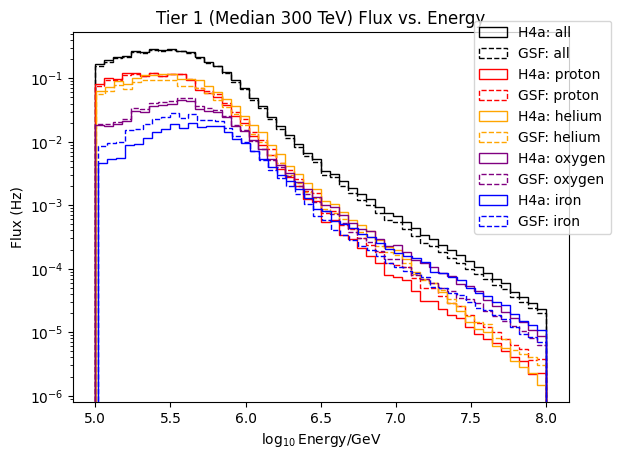

In [42]:
#tier 1 
ax = plt.subplot(1, 1, 1)
plt.hist(np.log10(tier1energy), bins=50, log=True, weights=weightstier1H4a, histtype='step', color='black', label='H4a: all')
plt.hist(np.log10(tier1energy), bins=50, log=True, weights=weightstier1GSF, histtype='step', color='black', linestyle='dashed', label='GSF: all')
plt.hist(np.log10(t1penergy), bins=50, log=True, weights=weightsH4a1p, histtype='step', color='red', label='H4a: proton')
plt.hist(np.log10(t1penergy), bins=50, log=True, weights=weightsGSF1p, histtype='step', color='red', linestyle='dashed', label='GSF: proton')
plt.hist(np.log10(t1henergy), bins=50, log=True, weights=weightsH4a1h, histtype='step', color='orange', label='H4a: helium')
plt.hist(np.log10(t1henergy), bins=50, log=True, weights=weightsGSF1h, histtype='step', color='orange', linestyle='dashed', label='GSF: helium')
plt.hist(np.log10(t1oenergy), bins=50, log=True, weights=weightsH4a1o, histtype='step', color='purple', label='H4a: oxygen')
plt.hist(np.log10(t1oenergy), bins=50, log=True, weights=weightsGSF1o, histtype='step', color='purple', linestyle='dashed', label='GSF: oxygen')
plt.hist(np.log10(t1Feenergy), bins=50, log=True, weights=weightsH4a1Fe, histtype='step', color='blue', label='H4a: iron')
plt.hist(np.log10(t1Feenergy), bins=50, log=True, weights=weightsGSF1Fe, histtype='step', color='blue', linestyle='dashed', label='GSF: iron')
plt.xlabel('$\log_{{10}}$Energy/GeV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 1 (Median 300 TeV) Flux vs. Energy')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

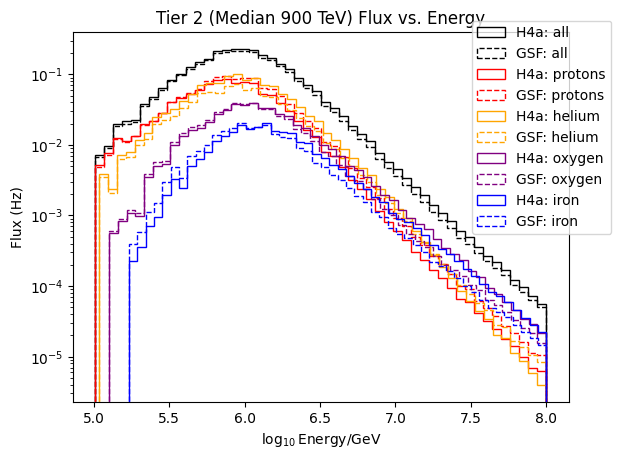

In [43]:
#tier 2 
ax = plt.subplot(1, 1, 1)
plt.hist(np.log10(tier2energy), bins=50, log=True, weights=weightstier2H4a, histtype='step', color='black', label='H4a: all')
plt.hist(np.log10(tier2energy), bins=50, log=True, weights=weightstier2GSF, histtype='step', color='black', linestyle='dashed', label='GSF: all')
plt.hist(np.log10(t2penergy), bins=50, log=True, weights=weightsH4a2p, histtype='step', color='red', label='H4a: protons')
plt.hist(np.log10(t2penergy), bins=50, log=True, weights=weightsGSF2p, histtype='step', color='red', linestyle='dashed', label='GSF: protons')
plt.hist(np.log10(t2henergy), bins=50, log=True, weights=weightsH4a2h, histtype='step', color='orange', label='H4a: helium')
plt.hist(np.log10(t2henergy), bins=50, log=True, weights=weightsGSF2h, histtype='step', color='orange', linestyle='dashed', label='GSF: helium')
plt.hist(np.log10(t2oenergy), bins=50, log=True, weights=weightsH4a2o, histtype='step', color='purple', label='H4a: oxygen')
plt.hist(np.log10(t2oenergy), bins=50, log=True, weights=weightsGSF2o, histtype='step', color='purple', linestyle='dashed', label='GSF: oxygen')
plt.hist(np.log10(t2Feenergy), bins=50, log=True, weights=weightsH4a2Fe, histtype='step', color='blue', label='H4a: iron')
plt.hist(np.log10(t2Feenergy), bins=50, log=True, weights=weightsGSF2Fe, histtype='step', color='blue', linestyle='dashed', label='GSF: iron')
plt.xlabel('$\log_{{10}}$Energy/GeV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 2 (Median 900 TeV) Flux vs. Energy')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

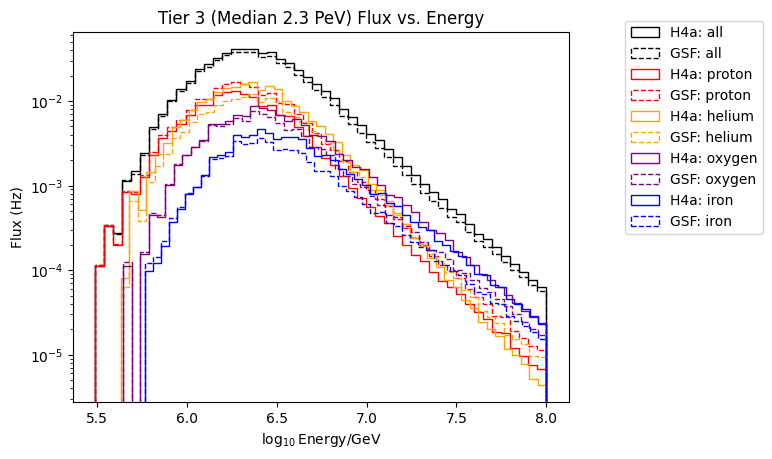

In [44]:
#tier 3
ax = plt.subplot(1, 1, 1)
plt.hist(np.log10(tier3energy), bins=50, log=True, weights=weightstier3H4a, histtype='step', color='black', label='H4a: all')
plt.hist(np.log10(tier3energy), bins=50, log=True, weights=weightstier3GSF, histtype='step', color='black', linestyle='dashed', label='GSF: all')
plt.hist(np.log10(t3penergy), bins=50, log=True, weights=weightsH4a3p, histtype='step', color='red', label='H4a: proton')
plt.hist(np.log10(t3penergy), bins=50, log=True, weights=weightsGSF3p, histtype='step', color='red', linestyle='dashed', label='GSF: proton')
plt.hist(np.log10(t3henergy), bins=50, log=True, weights=weightsH4a3h, histtype='step', color='orange', label='H4a: helium')
plt.hist(np.log10(t3henergy), bins=50, log=True, weights=weightsGSF3h, histtype='step', color='orange', linestyle='dashed', label='GSF: helium')
plt.hist(np.log10(t3oenergy), bins=50, log=True, weights=weightsH4a3o, histtype='step', color='purple', label='H4a: oxygen')
plt.hist(np.log10(t3oenergy), bins=50, log=True, weights=weightsGSF3o, histtype='step', color='purple', linestyle='dashed', label='GSF: oxygen')
plt.hist(np.log10(t3Feenergy), bins=50, log=True, weights=weightsH4a3Fe, histtype='step', color='blue', label='H4a: iron')
plt.hist(np.log10(t3Feenergy), bins=50, log=True, weights=weightsGSF3Fe, histtype='step', color='blue', linestyle='dashed', label='GSF: iron')
plt.xlabel('$\log_{{10}}$Energy/GeV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 3 (Median 2.3 PeV) Flux vs. Energy')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

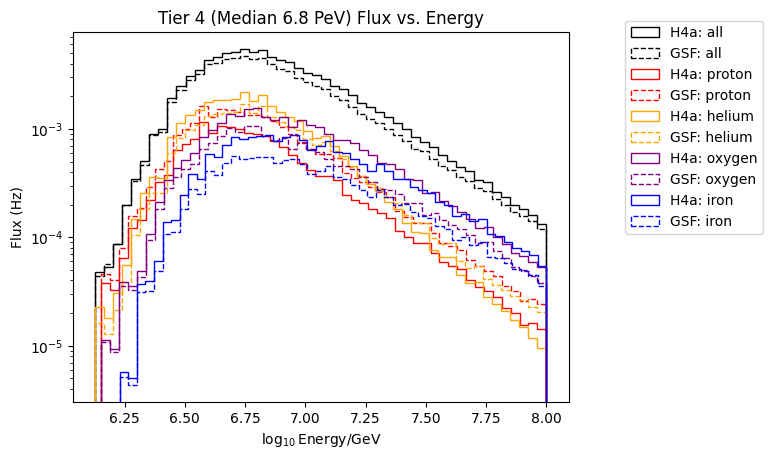

In [45]:
#tier 4
ax = plt.subplot(1, 1, 1)
plt.hist(np.log10(tier4energy), bins=50, log=True, weights=weightstier4H4a, histtype='step', color='black', label='H4a: all')
plt.hist(np.log10(tier4energy), bins=50, log=True, weights=weightstier4GSF, histtype='step', color='black', linestyle='dashed', label='GSF: all')
plt.hist(np.log10(t4penergy), bins=50, log=True, weights=weightsH4a4p, histtype='step', color='red', label='H4a: proton')
plt.hist(np.log10(t4penergy), bins=50, log=True, weights=weightsGSF4p, histtype='step', color='red', linestyle='dashed', label='GSF: proton')
plt.hist(np.log10(t4henergy), bins=50, log=True, weights=weightsH4a4h, histtype='step', color='orange', label='H4a: helium')
plt.hist(np.log10(t4henergy), bins=50, log=True, weights=weightsGSF4h, histtype='step', color='orange', linestyle='dashed', label='GSF: helium')
plt.hist(np.log10(t4oenergy), bins=50, log=True, weights=weightsH4a4o, histtype='step', color='purple', label='H4a: oxygen')
plt.hist(np.log10(t4oenergy), bins=50, log=True, weights=weightsGSF4o, histtype='step', color='purple', linestyle='dashed', label='GSF: oxygen')
plt.hist(np.log10(t4Feenergy), bins=50, log=True, weights=weightsH4a4Fe, histtype='step', color='blue', label='H4a: iron')
plt.hist(np.log10(t4Feenergy), bins=50, log=True, weights=weightsGSF4Fe, histtype='step', color='blue', linestyle='dashed', label='GSF: iron')
plt.xlabel('$\log_{{10}}$Energy/GeV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 4 (Median 6.8 PeV) Flux vs. Energy')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()